In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [2]:
dataset = pd.read_csv('train_T.csv')
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
dataset.shape

(8693, 14)

## missing numerical values, missing categorical values

In [4]:
dataset.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## show outliers in age

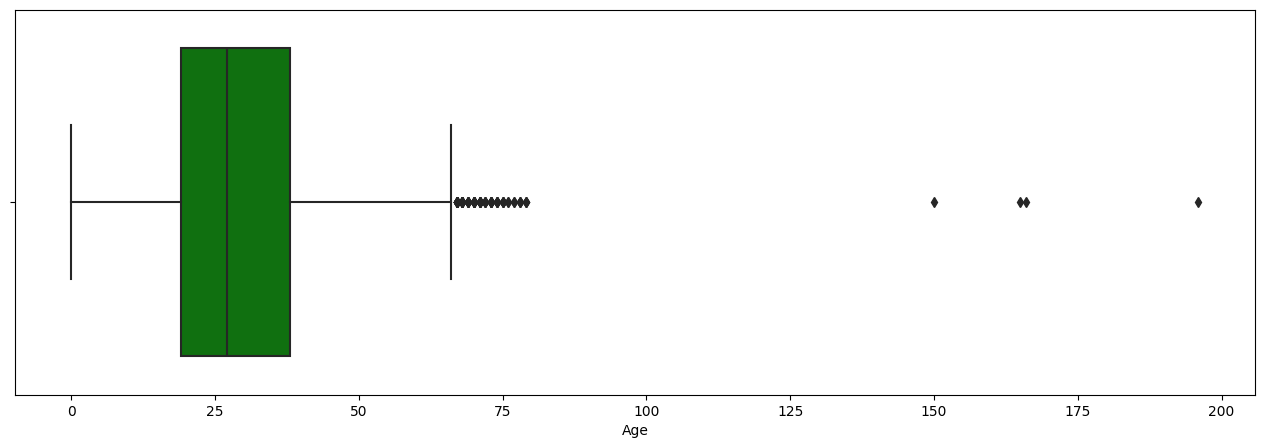

In [5]:
plt.figure(figsize=(16,5))
sns.boxplot(data=dataset, x='Age', color = 'green')
plt.show()

## Impute the values using Scikit learn with a strategy that could fit missing string values

# Age

In [6]:
# Identify the column with missing values ('Age' in this case)
column_with_missing_values = 'Age'

# Extract the column with missing values
column_data = dataset[column_with_missing_values]

# Reshape the column_data to a 2D array as SimpleImputer expects 2D input
column_data_reshaped = column_data.values.reshape(-1, 1)

# Use SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_values = imputer.fit_transform(column_data_reshaped)

# Replace missing values in the specific column
dataset[column_with_missing_values] = imputed_values


# check age

In [7]:
dataset.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# HomePlanet

In [8]:
# Identify the column with missing values ('Age' in this case)
column_with_missing_values = 'HomePlanet'

# Extract the column with missing values
column_data = dataset[column_with_missing_values]

# Reshape the column_data to a 2D array as SimpleImputer expects 2D input
column_data_reshaped = column_data.values.reshape(-1, 1)

# Use SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputed_values = imputer.fit_transform(column_data_reshaped)

# Flatten the 2D array to 1D
imputed_values_flat = imputed_values.flatten()

# Replace missing values in the specific column
dataset[column_with_missing_values] = imputed_values_flat


# chack HomePlanet

In [9]:
dataset.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
column_data_reshaped.shape

(8693, 1)

In [11]:
imputed_values_flat.shape

(8693,)

## Scale the numerical values with the three discussed different methods and be able to interpret the different results and reason about the best method for the chosen data

# 1  Min-Max Scaling 
MinMax scaler formula for each element in the targeted series/column:

$x_{std} = \frac{x_{i} - \min_{X}} {\max_{X} - \min_{X}}$, where:
- $x_{i}$ is a number in the targeted series
- $\min_{X}$ is the smallest number in the targeted series
- $\max_{X}$ is the largest number in the targeted series
- $x_{std}$ is the newly calculated value of a scale from 0..1 to replace the corresponding original value, i.e., $x_{i}$ 

$x_{scaled} = x_{std} * (max - min) + min$, where:
- $max$ is the maximum value of the required range
- $min$ is the minimum value of the required range
- $x_{scaled}$ is the newly calculated value of the MinMax scaler to replace the corresponding original value, i.e., $x_{std}$

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [13]:
# Separate numerical and categorical features
numerical_features = dataset.select_dtypes(include=['float64', 'int64']).columns


categorical_features = dataset.select_dtypes(include=[object]).columns

In [14]:
# Extract numerical features from the DataFrame
X_numerical = dataset[numerical_features]

# Min-Max Scaling for numerical features
min_max_scaler = MinMaxScaler()
X_numerical_scaled = min_max_scaler.fit_transform(X_numerical)
print("Min-Max Scaled Data:")
print(X_numerical_scaled)

Min-Max Scaled Data:
[[1.98979592e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.22448980e-01 7.60801284e-03 3.01881729e-04 1.06419207e-03
  2.45001785e-02 1.82322960e-03]
 [2.95918367e-01 3.00132617e-03 1.19947674e-01 0.00000000e+00
  2.99669761e-01 2.03041478e-03]
 ...
 [1.32653061e-01 0.00000000e+00 0.00000000e+00 7.96867019e-02
  4.46269190e-05 0.00000000e+00]
 [1.63265306e-01 0.00000000e+00 3.51859927e-02 0.00000000e+00
  1.57533024e-02 1.34048813e-01]
 [2.24489796e-01 8.79458365e-03 1.57246839e-01 0.00000000e+00
  0.00000000e+00 4.97244437e-04]]


In [15]:
# Separate numerical and categorical features
numerical_features = dataset.select_dtypes(include=['float64', 'int64'])


categorical_features = dataset.select_dtypes(include=[object]).columns

# 2 StandardScaler

In [16]:
# Create an instance of StandardScaler
standard_scaler = StandardScaler()

# Fit and transform the numerical features (X_numerical)
X_numerical_scaled = standard_scaler.fit_transform(numerical_features)

# Print the standardized data
print("Standardized Data:")
print(X_numerical_scaled)

Standardized Data:
[[ 0.68927011 -0.33702544 -0.28427377 -0.28731673 -0.27373585 -0.26609771]
 [-0.33514174 -0.17352835 -0.27868854 -0.24597123  0.20926721 -0.22769155]
 [ 1.98685846 -0.27252659  1.93492201 -0.28731673  5.63403389 -0.22332722]
 ...
 [-0.19855349 -0.33702544 -0.28427377  2.8086338  -0.27285607 -0.26609771]
 [ 0.21121125 -0.33702544  0.36671515 -0.28731673  0.03682896  2.55762723]
 [ 1.03074073 -0.1480288   2.6250075  -0.28731673 -0.27373585 -0.2556233 ]]


# 3 Robust Scaling
$x_{scaled} = \frac{x_{i} - \widetilde{X}} {X_{75} - X_{25}}$, where:
- $x_{i}$ is a number in the targeted series
- $\widetilde{X}$ is the calculated median of all elements in the targeted series/column, a.k.a. $X_{50}$
- $X_{75}$ is the calculated $75^{th}$ percentile of all elements in the target series/column
- $X_{25}$ is the calculated $25^{th}$ percentile of all elements in the target series/column
- $x_{scaled}$ is the newly calculated value of the robust scaler to replace the corresponding original value, i.e., $x_{i}$

In [17]:
robust_scaler = RobustScaler()
X_train_robust_scaled = robust_scaler.fit_transform(numerical_features)
X_train_robust_scaled

array([[ 7.05882353e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.76470588e-01,  2.31914894e+00,  1.18421053e-01,
         9.25925926e-01,  9.30508475e+00,  9.56521739e-01],
       [ 1.82352941e+00,  9.14893617e-01,  4.70526316e+01,
         0.00000000e+00,  1.13813559e+02,  1.06521739e+00],
       ...,
       [-5.88235294e-02,  0.00000000e+00,  0.00000000e+00,
         6.93333333e+01,  1.69491525e-02,  0.00000000e+00],
       [ 2.94117647e-01,  0.00000000e+00,  1.38026316e+01,
         0.00000000e+00,  5.98305085e+00,  7.03260870e+01],
       [ 1.00000000e+00,  2.68085106e+00,  6.16842105e+01,
         0.00000000e+00,  0.00000000e+00,  2.60869565e-01]])

# Encode the categorical values with the two discussed different methods

In [18]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [20]:
dataset['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [21]:
dataset['HomePlanet'].value_counts()

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64

# 1 LabelEncoder


In [22]:
label_encoder = LabelEncoder()
dataset['LabelEncoderHomePlanet'] = label_encoder.fit_transform(dataset['HomePlanet'])
dataset['LabelEncoderHomePlanet']

0       1
1       0
2       1
3       1
4       0
       ..
8688    1
8689    0
8690    0
8691    1
8692    1
Name: LabelEncoderHomePlanet, Length: 8693, dtype: int32

In [23]:
dataset['LabelEncoderHomePlanet'].unique()

array([1, 0, 2])

# 2 One Hot Encoder¶


In [36]:
# Create an instance of OneHotEncoder
onehot = OneHotEncoder()

# Apply One-Hot Encoding to the categorical feature
onehot_encoded = onehot.fit_transform(dataset[['HomePlanet']])

# Convert the one-hot encoded array to a DataFrame with appropriate column names
onehot_df = pd.DataFrame(onehot_encoded.toarray(), columns=onehot.get_feature_names_out(['HomePlanet']))

# Concatenate the one-hot encoded columns with the original DataFrame
dataset = pd.concat([dataset, onehot_df], axis=1)


In [37]:
dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,LabelEncoderHomePlanet,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0.0,1.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,1.0,0.0,0.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0.0,1.0,0.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0.0,1.0,0.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1,0.0,1.0,0.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,1.0,0.0,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,1.0,0.0,0.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,0.0,1.0,0.0
